# What can we learn about people who voted for Hillary Clinton and Donald Trump from Electorate Data?

(For an overview of the data, the `Voters()` class as its associated functions, see the README)

In [1]:
from polls import polls
from Voters import *

Here's a list of the available questions, and their column labels

In [2]:
#keys = polls.keys()
#print("###COLUMNS###")
#for key in keys:
#    print(polls[key][0] + '  --  ' + key)

Let's start trying to investigate what the US electorate thinks about Hillary Clinton

In [3]:
all_voters = Voters()
presvote = all_voters.get_voters(column_label="turnout16_2016", selection=1).get_column(column_label="presvote16post_2016")

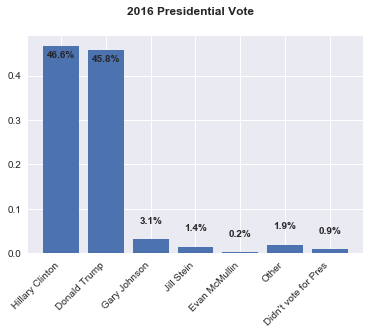

N = 7611
NaNs (percentage): 0.0%


In [4]:
presvote.plot_percentages(rotate_labels=True)

So, what can we say about the data so far? Donald Trump's percentage is too low by are off by 1.1%, and Hillary's percentages are too low by about 1.58%. All other candidates are off by <1%.

## Candidate favorability for each set of voters

In [5]:
T_voters = all_voters.get_voters(column_label="turnout16_2016", selection=1).get_voters(column_label="presvote16post_2016", selection=2)
H_voters = all_voters.get_voters(column_label="turnout16_2016", selection=1).get_voters(column_label="presvote16post_2016", selection=1)

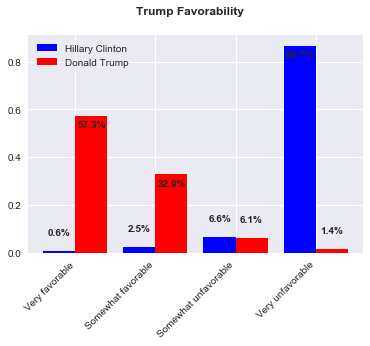

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.0%
NaNs_Donald Trump (percentage): 0.7%


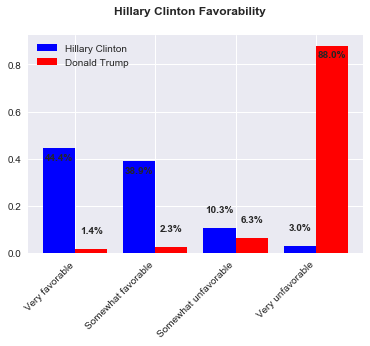

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.9%
NaNs_Donald Trump (percentage): 1.3%


In [6]:
H_voters.plot_comparison(T_voters, selection="fav_trump_2016")
H_voters.plot_comparison(T_voters, selection="fav_hrc_2016")

## Education levels

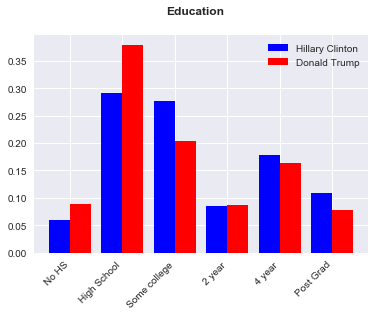

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.1%
NaNs_Donald Trump (percentage): 0.2%


In [7]:
H_voters.plot_comparison(T_voters, selection="educ_baseline", bar_labels=False)

## Race

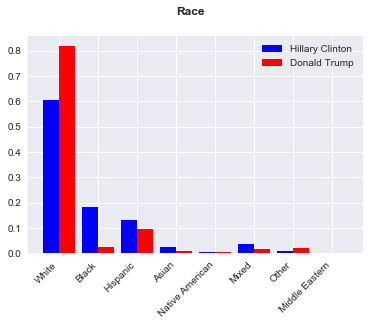

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.1%
NaNs_Donald Trump (percentage): 0.4%


In [8]:
H_voters.plot_comparison(T_voters, selection="race_baseline", bar_labels=False)

## Thoughts about race

It's really a matter of some people not trying hard enough; if blacks would only try harder they could be just as well off as whites.


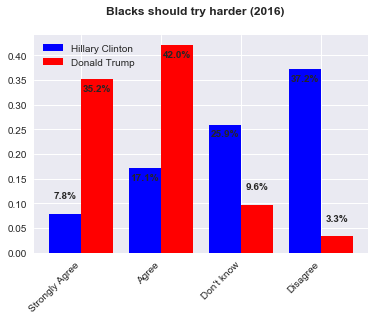

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 2.7%
NaNs_Donald Trump (percentage): 1.3%
 
Agree or Disagree: over the past few years, Blacks have gotten less than they deserve.


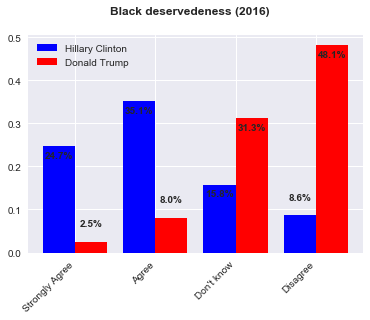

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 3.4%
NaNs_Donald Trump (percentage): 2.2%
 
Agree or Disagree: Irish, Italian, Jewish and other minorities overcame prejudice and worked their way up. Blacks should do the same without any special favors.


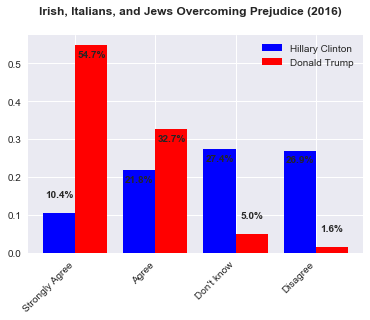

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 2.7%
NaNs_Donald Trump (percentage): 1.3%
 
Generation of slavery and discrimination have created conditions that make it difficult for black to work their way out of the lower class.


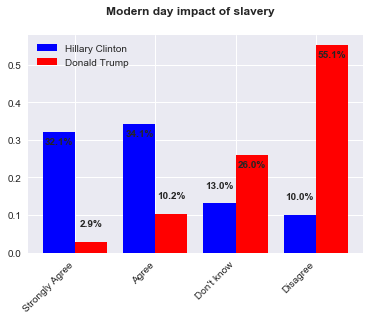

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 2.4%
NaNs_Donald Trump (percentage): 1.1%


In [9]:
print(polls["race_tryharder_2016"][1])
H_voters.plot_comparison(T_voters, selection="race_tryharder_2016")
print(" ")
print(polls["race_deservemore_2016"][1])
H_voters.plot_comparison(T_voters, selection="race_deservemore_2016")
print(" ")
print(polls["race_overcome_2016"][1])
H_voters.plot_comparison(T_voters, selection="race_overcome_2016")
print(" ")
print(polls["race_slave_2016"][1])
H_voters.plot_comparison(T_voters, selection="race_slave_2016")

## Employment Status

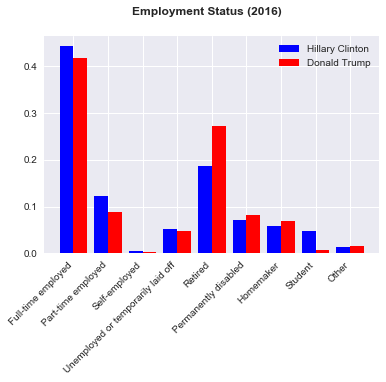

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.0%


In [10]:
H_voters.plot_comparison(T_voters, selection="employ_2016", bar_labels=False)

## Family Income

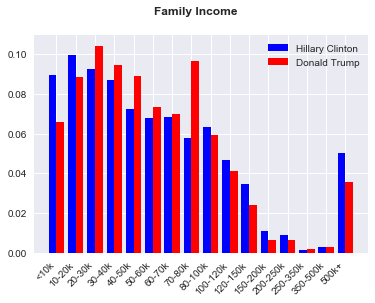

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.4%
NaNs_Donald Trump (percentage): 0.2%


In [11]:
H_voters.plot_comparison(T_voters, selection="faminc_2016", bar_labels=False)

## Own or rent home

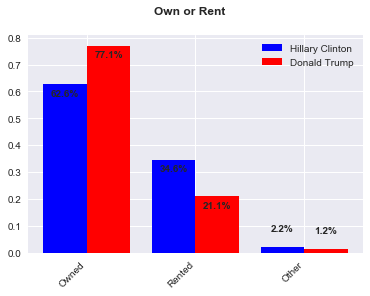

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.6%
NaNs_Donald Trump (percentage): 0.6%


In [12]:
H_voters.plot_comparison(T_voters, selection="ownorrent_baseline")

## Gender

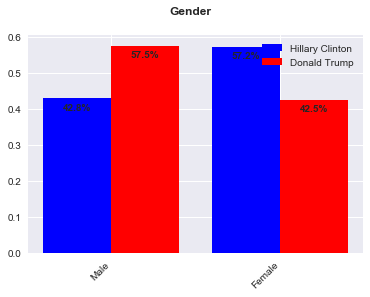

N_Hillary Clinton = 3545
N_Donald Trump = 3479


In [13]:
H_voters.plot_comparison(T_voters, selection="gender_baseline")

## Religion

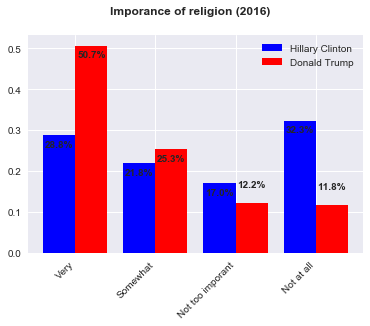

N_Hillary Clinton = 3545
N_Donald Trump = 3479


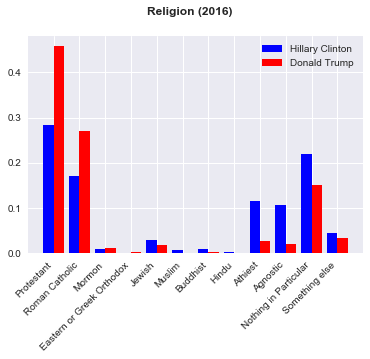

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.1%
NaNs_Donald Trump (percentage): 0.1%


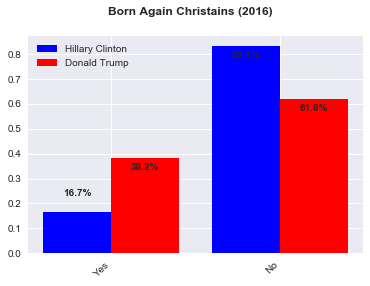

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.2%
NaNs_Donald Trump (percentage): 0.0%


In [14]:
H_voters.plot_comparison(T_voters, selection="pew_religimp_2016")
H_voters.plot_comparison(T_voters, selection="religpew_2016", bar_labels=False)
H_voters.plot_comparison(T_voters, selection="pew_bornagain_2016")

## 2012 vote / Obama Favorability / Job approval

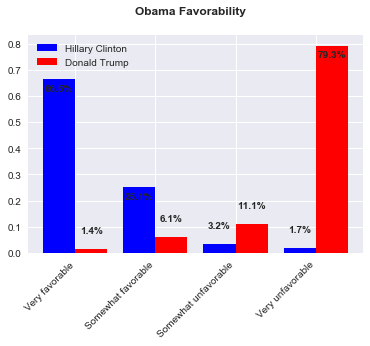

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.1%
NaNs_Donald Trump (percentage): 0.7%


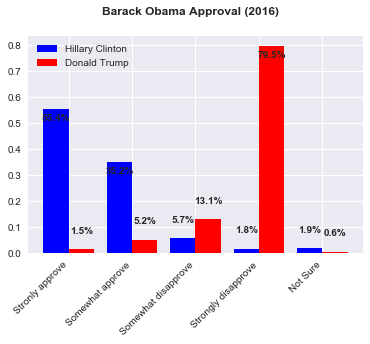

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.0%
NaNs_Donald Trump (percentage): 0.1%


In [15]:
#H_voters.plot_comparison(T_voters, selection="post_presvote12_2012")
H_voters.plot_comparison(T_voters, selection="fav_obama_2016")
H_voters.plot_comparison(T_voters, selection="obamaapp_2016")

## Economic Outlook/Direction of the Country

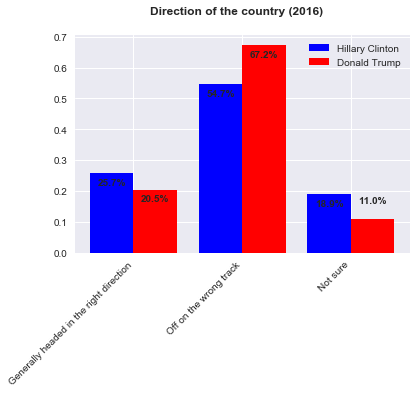

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.8%
NaNs_Donald Trump (percentage): 1.4%


In [16]:
H_voters.plot_comparison(T_voters, selection="track_2016")

## Trust in Gov

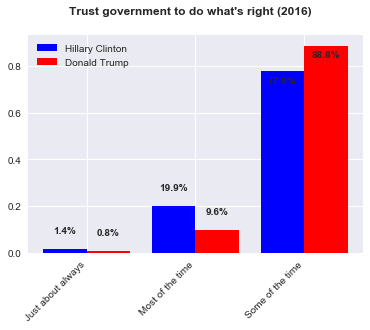

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.8%
NaNs_Donald Trump (percentage): 0.8%


In [17]:
H_voters.plot_comparison(T_voters, selection="trustgovt_2016")

## Values/Culture

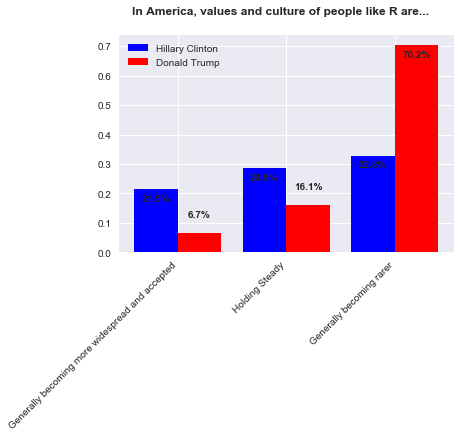

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.5%
NaNs_Donald Trump (percentage): 0.4%


In [18]:
H_voters.plot_comparison(T_voters, selection="values_culture_2016")

## Trust People

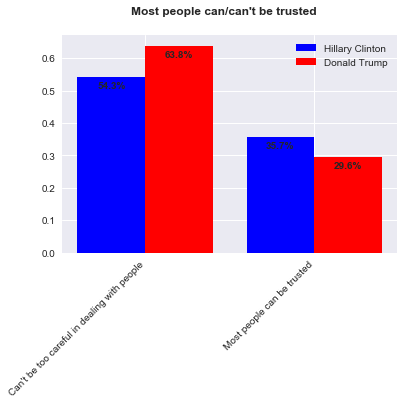

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.1%
NaNs_Donald Trump (percentage): 0.5%


In [19]:
H_voters.plot_comparison(T_voters, selection="trust_people_2016")

## Hours TV Watched

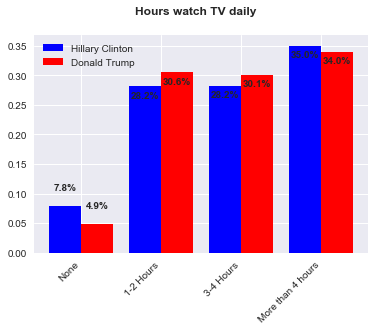

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.7%
NaNs_Donald Trump (percentage): 0.5%


In [20]:
H_voters.plot_comparison(T_voters, selection="watchtv_baseline")

## Most Important Issue

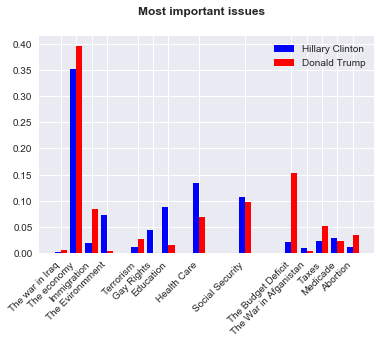

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 7.4%
NaNs_Donald Trump (percentage): 3.5%


In [32]:
H_voters.plot_comparison(T_voters, selection="imissf_baseline", bar_labels=False)

## Immigration

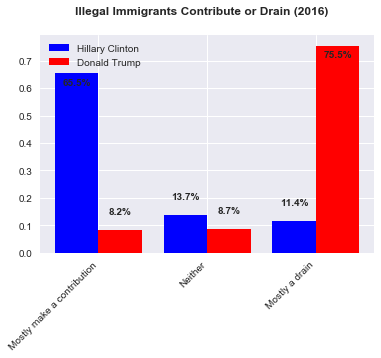

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.5%
NaNs_Donald Trump (percentage): 0.3%


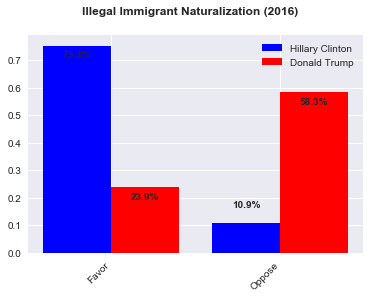

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.5%
NaNs_Donald Trump (percentage): 0.5%


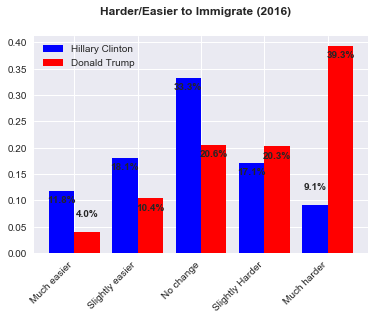

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.7%
NaNs_Donald Trump (percentage): 0.2%


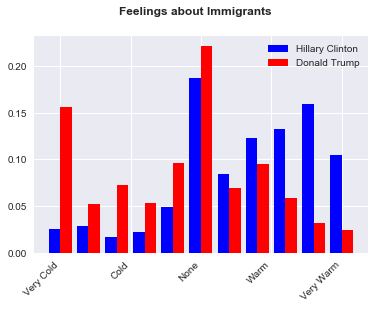

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 2.1%
NaNs_Donald Trump (percentage): 2.6%


In [22]:
H_voters.plot_comparison(T_voters, selection="immi_contribution_2016")
H_voters.plot_comparison(T_voters, selection="immi_naturalize_2016")
H_voters.plot_comparison(T_voters, selection="immi_makedifficult_2016")
H_voters.plot_comparison(T_voters, selection="ft_immig_2016", bar_labels=False, ft=True)

## Abortion/Gay Marriage

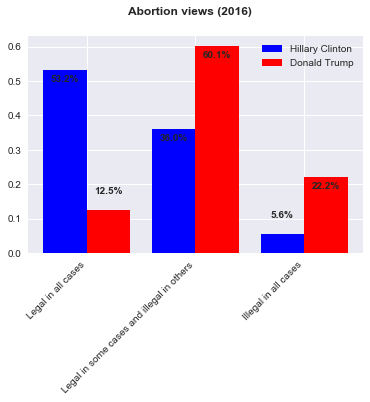

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.4%
NaNs_Donald Trump (percentage): 0.4%


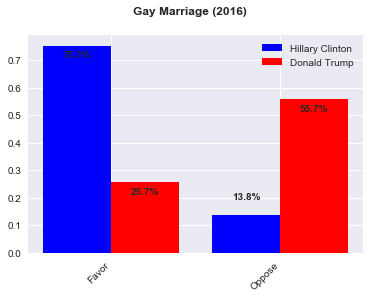

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.1%
NaNs_Donald Trump (percentage): 0.3%


In [23]:
H_voters.plot_comparison(T_voters, selection="abortview3_2016")
H_voters.plot_comparison(T_voters, selection="gaymar_2016")

## Increase Taxes on Wealthy

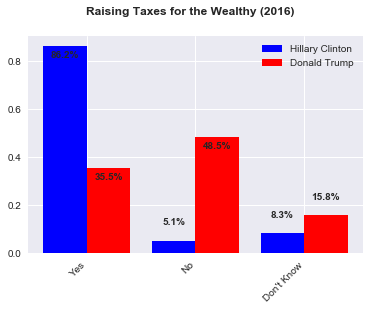

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.4%
NaNs_Donald Trump (percentage): 0.3%


In [24]:
H_voters.plot_comparison(T_voters, selection="taxdoug_2016")

## Universal Health Coverage

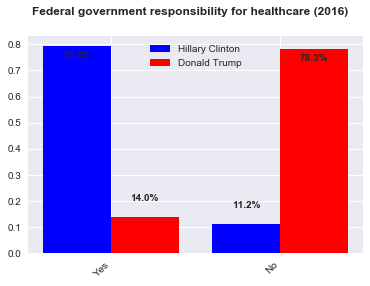

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.6%
NaNs_Donald Trump (percentage): 0.3%


In [25]:
H_voters.plot_comparison(T_voters, selection="univhealthcov_2016")

## Global Warming

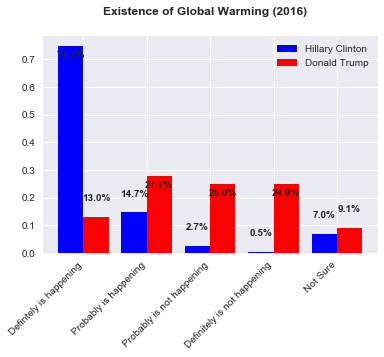

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.4%
NaNs_Donald Trump (percentage): 0.2%


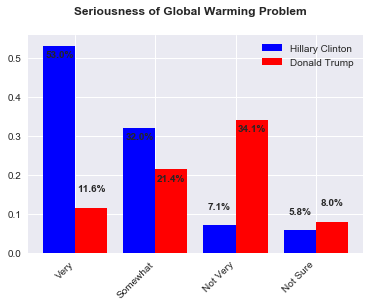

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 2.1%
NaNs_Donald Trump (percentage): 24.9%


In [26]:
H_voters.plot_comparison(T_voters, selection="envwarm_2016")
H_voters.plot_comparison(T_voters, selection="envser2_baseline")

## Trade Policy

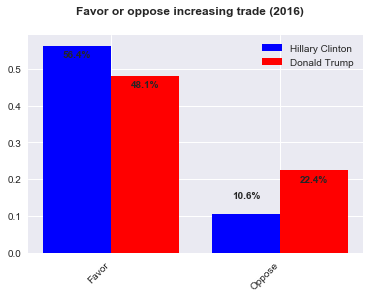

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.9%
NaNs_Donald Trump (percentage): 0.5%


In [27]:
H_voters.plot_comparison(T_voters, selection="tradepolicy_2016")

## Ideology

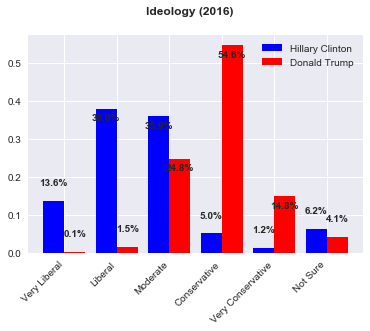

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.1%
NaNs_Donald Trump (percentage): 0.0%


In [28]:
H_voters.plot_comparison(T_voters, selection="ideo5_2016")

## Bernie Sanders

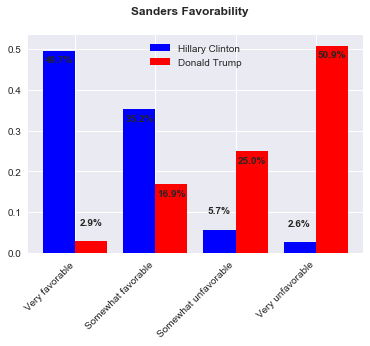

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.2%
NaNs_Donald Trump (percentage): 0.6%


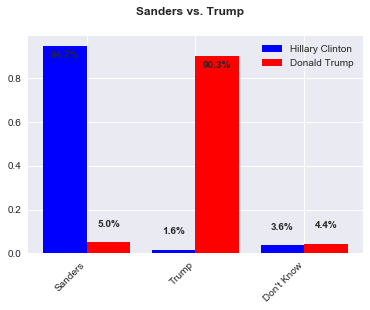

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 0.2%
NaNs_Donald Trump (percentage): 0.3%


In [29]:
H_voters.plot_comparison(T_voters, selection="fav_sanders_2016")
H_voters.plot_comparison(T_voters, selection="Sanders_Trump_2016")

## Feelings Thermometers

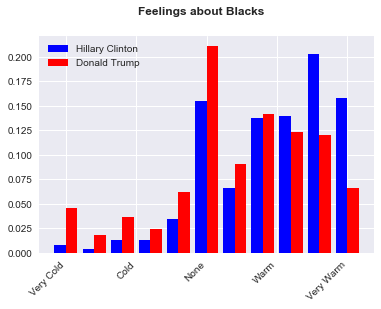

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.9%
NaNs_Donald Trump (percentage): 2.4%


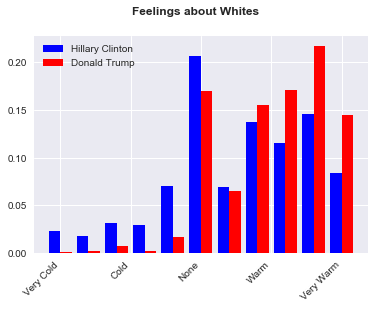

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 2.2%
NaNs_Donald Trump (percentage): 1.4%


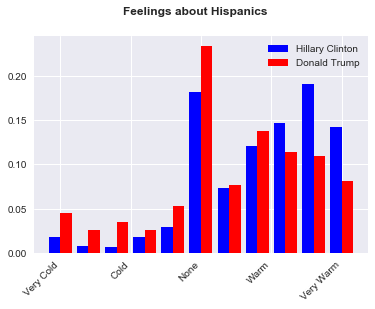

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.9%
NaNs_Donald Trump (percentage): 1.8%


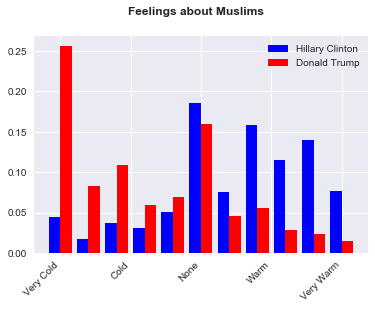

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.6%
NaNs_Donald Trump (percentage): 6.1%


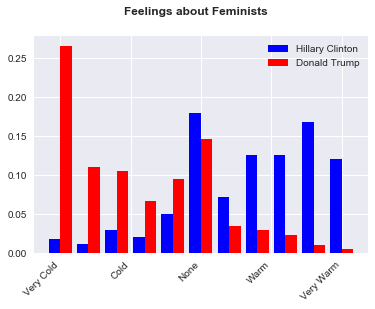

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.8%
NaNs_Donald Trump (percentage): 5.1%


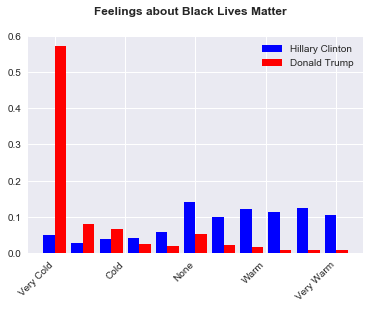

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 2.2%
NaNs_Donald Trump (percentage): 9.0%


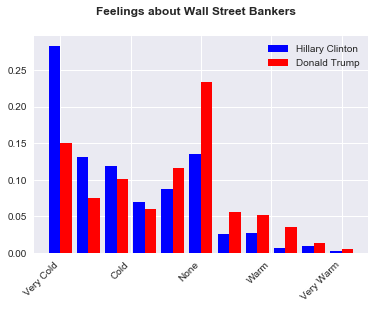

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 4.9%
NaNs_Donald Trump (percentage): 3.8%


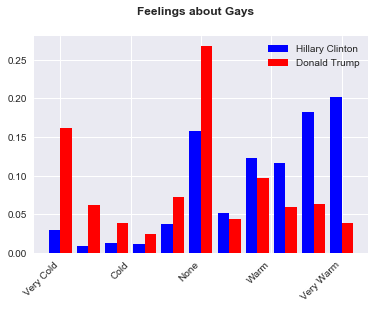

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.7%
NaNs_Donald Trump (percentage): 3.4%


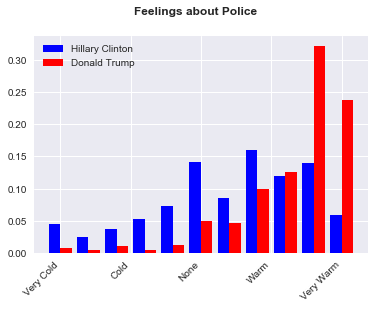

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 1.2%
NaNs_Donald Trump (percentage): 1.5%


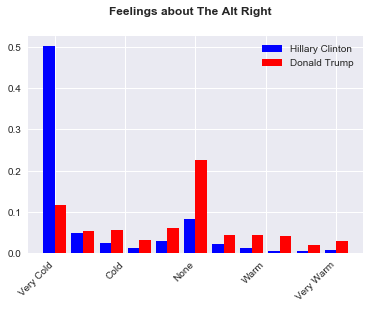

N_Hillary Clinton = 3545
N_Donald Trump = 3479
NaNs_Hillary Clinton (percentage): 9.2%
NaNs_Donald Trump (percentage): 5.9%


In [30]:
H_voters.plot_comparison(T_voters, selection="ft_black_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_white_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_hisp_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_muslim_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_fem_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_blm_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_wallst_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_gays_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_police_2016", bar_labels=False, ft=True)
H_voters.plot_comparison(T_voters, selection="ft_altright_2016", bar_labels=False, ft=True)